<a href="https://colab.research.google.com/github/khanapujiyanti/PSDS_3.0_KelasDasar/blob/main/mini_projek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coffee and Code**

#Latar Belakang Dataset

Kopi merupakan salah satu minuman yang mengandung kafein. Kopi dipercaya dapat meningkatkan kebugaran, meningkatkan performa kerja serta dapat menambah energi dan menghilangkan perasaan mengantuk, sehingga kopi dikatakan dapat meningkatkan konsentrasi. Konsentrasi sangat diperlukan pada saat menyelami beberapa kode yang rumit.

dataset ```Coffe and code dataset``` memberikan poin data yang menarik dari bidang CodingHours, CoffeeCupsPerDay, CoffeeTime, CodingWithoutCoffe, CoffeeType, CoffeeSolveBugs, Gender, Country dan AgeRange.


#Pertanyaan Analisis

1. Apa type kopi yang paling sering diminum jika dilihat dari jumlah cangkir kopi per hari?

2. Apakah dengan meminum kopi dapat memengaruhi lamanya waktu pengkodean? jika dilihat dari rata-rata CodingHours.

#EDA (Exploratoty Data Analysis)

Import Library

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Mengakses Dataset

In [83]:
coffee_code = pd.read_csv('/content/CoffeeAndCodeLT2018.csv')
coffee_code.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


Dimensi Data

In [84]:
coffee_code.shape

(100, 9)

Variabel Pada Dataset

In [85]:
coffee_code.columns.values

array(['CodingHours', 'CoffeeCupsPerDay', 'CoffeeTime',
       'CodingWithoutCoffee', 'CoffeeType', 'CoffeeSolveBugs', 'Gender',
       'Country', 'AgeRange'], dtype=object)

In [86]:
coffee_code.dtypes

CodingHours             int64
CoffeeCupsPerDay        int64
CoffeeTime             object
CodingWithoutCoffee    object
CoffeeType             object
CoffeeSolveBugs        object
Gender                 object
Country                object
AgeRange               object
dtype: object

In [87]:
coffee_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


Mengecek Missing Data

In [88]:
coffee_code.isnull().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             1
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               2
dtype: int64

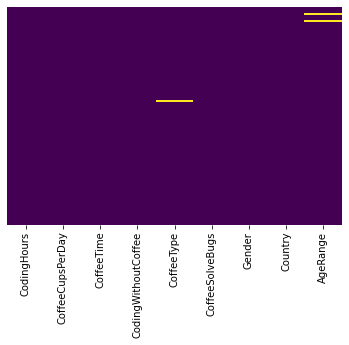

In [89]:
sns.heatmap(coffee_code.isnull(), cbar=False, yticklabels=False, cmap='viridis')

Kolom dengan data kosong adalah CoffeeType dan AgeRange

Mengecek Outlier

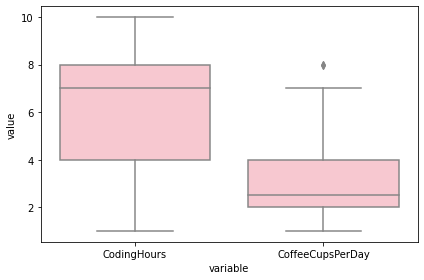

In [90]:
coffee_code1 = coffee_code.select_dtypes(include=['int64']) #Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='pink', orient='v', data=pd.melt(coffee_code1))
plt.tight_layout()

Kolom  yang memiliki outlier adalah CodingHours dan CoffeeCupsPerDay

Melikat Korelasi Data

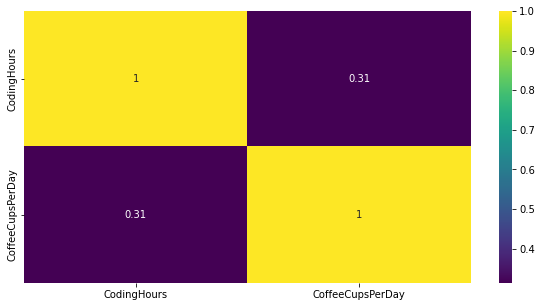

In [91]:
k = len(coffee_code1.columns)
cm = coffee_code1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap = 'viridis')

Melihat Statistik Data

In [92]:
coffee_code.describe()

,CodingHours,CoffeeCupsPerDay
count,100.000000,100.000000
mean,6.410000,2.890000
std,2.644205,1.613673
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


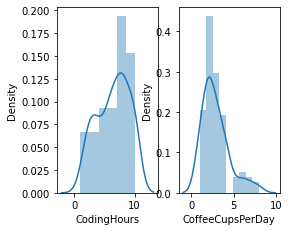

In [93]:
l = coffee_code1.columns.values
number_of_columns=len(coffee_code1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns, 5*number_of_rows))
for i in range (0, len(l)):
  plt.subplot(number_of_rows + 1, number_of_columns, i+1)
  sns.distplot(coffee_code[l[i]], kde=True)

Pair Plot

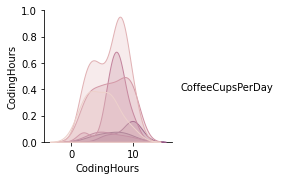

In [94]:
sns.pairplot(coffee_code1, hue="CoffeeCupsPerDay")

#Data Preparation

DataFrame untuk mengetahui visualisasi type kopi yang paling sering diminum jika dilihat dari jumlah cangkir kopi per hari

In [95]:
dataframe=coffee_code.groupby('CoffeeType')['CoffeeCupsPerDay'].sum()
dataframe=pd.DataFrame(dataframe)
dataframe=dataframe.reset_index()
dataframe

,CoffeeType,CoffeeCupsPerDay
0,American Coffee,71
1,Americano,5
2,Caffè latte,10
3,Cappuccino,22
4,Double Espresso (Doppio),17
5,Espresso (Short Black),28
6,Nescafe,61
7,Turkish,69


DataFrame untuk mengetahui visualisasi rata-rata waktu pengkodean jika dilakukan dengan dengan meminum kopi.

In [117]:
dataframe1=coffee_code.groupby('CodingWithoutCoffee')['CodingHours'].mean()
dataframe1=pd.DataFrame(dataframe1)
dataframe1=dataframe1.reset_index()
dataframe1

,CodingWithoutCoffee,CodingHours
0,No,7.000000
1,Sometimes,6.647059
2,Yes,5.633333


#Data Visualization

1. Apa type kopi yang paling sering diminum jika dilihat dari jumlah cangkir kopi per hari?

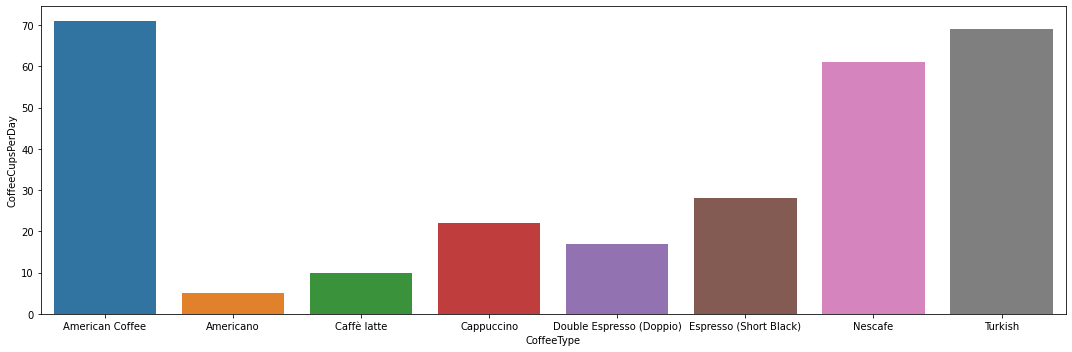

In [97]:
plt.figure(figsize=(15,5))
sns.barplot(x=dataframe['CoffeeType'], y=dataframe['CoffeeCupsPerDay'] )
plt.tight_layout()

Jadi type kopi yang paling sering diminum jika dilihat dari jumlah cangkir kopi per hari adalah American Coffee.

2. Apakah dengan meminum kopi dapat memengaruhi lamanya waktu pengkodean? jika dilihat dari rata-rata CodingHours.

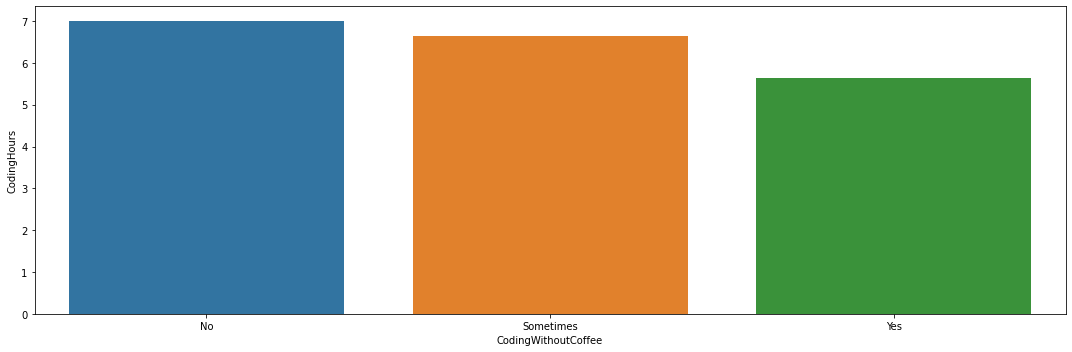

In [118]:
plt.figure(figsize=(15,5))
sns.barplot(x=dataframe1['CodingWithoutCoffee'], y=dataframe1['CodingHours'])
plt.tight_layout()

Kesimpulannya meminum kopi dapat meningkatkan lamanya waktu pengkodean(ngoding).